# **Solutions to Exercises, Lab 2**

by Ding

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

**Question 1**

What would happen if we intiliase all weights as zeroes?

Solution

Use the same code.

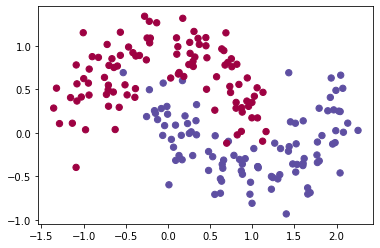

In [ ]:
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

def plot_decision_boundary(pred_func):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

num_examples = len(X)
nn_input_dim = 2
nn_output_dim = 2

epsilon = 0.01
reg_lambda = 0.01

def calculate_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    a1 = X.dot(W1) + b1
    h1 = np.tanh(a1)
    a2 = h1.dot(W2) + b2
    exp_scores = np.exp(a2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs)
    return 1./num_examples * data_loss

def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    a1 = x.dot(W1) + b1
    h1 = np.tanh(a1)
    a2 = h1.dot(W2) + b2
    exp_scores = np.exp(a2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

We used the np.random.randn() function to generate a matrix of random values for W1 and W2.

Now, use np.zeros() to generate a matrix of zeros for W1 and W2, like b1 and b2.

Don't change the dimensions and notice the syntax.

In [ ]:
def build_model(nn_hdim, num_passes=20000, print_loss=False):
    
    np.random.seed(0)
    W1 = np.zeros((nn_input_dim, nn_hdim)) # Change it!
    b1 = np.zeros((1, nn_hdim))
    W2 = np.zeros((nn_hdim, nn_output_dim)) # Change it!
    b2 = np.zeros((1, nn_output_dim))

    model = {}
    
    for i in range(0, num_passes):

        a1 = X.dot(W1) + b1
        h1 = np.tanh(a1)
        a2 = h1.dot(W2) + b2
        exp_scores = np.exp(a2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (h1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(h1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)

        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1

        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
        
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
        if print_loss and i % 1000 == 0:
          print("Loss after iteration %i: %f" %(i, calculate_loss(model)))
    
    return model

Loss after iteration 0: 0.693147
Loss after iteration 1000: 0.693147
Loss after iteration 2000: 0.693147
Loss after iteration 3000: 0.693147
Loss after iteration 4000: 0.693147
Loss after iteration 5000: 0.693147
Loss after iteration 6000: 0.693147
Loss after iteration 7000: 0.693147
Loss after iteration 8000: 0.693147
Loss after iteration 9000: 0.693147
Loss after iteration 10000: 0.693147
Loss after iteration 11000: 0.693147
Loss after iteration 12000: 0.693147
Loss after iteration 13000: 0.693147
Loss after iteration 14000: 0.693147
Loss after iteration 15000: 0.693147
Loss after iteration 16000: 0.693147
Loss after iteration 17000: 0.693147
Loss after iteration 18000: 0.693147
Loss after iteration 19000: 0.693147


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 3')

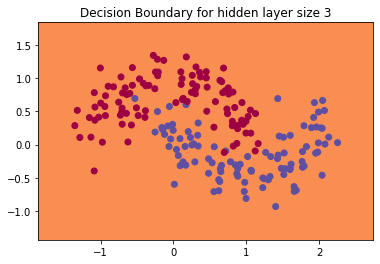

In [ ]:
model = build_model(3, print_loss=True)

plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layer size 3")

If all the weights are initialized to zeros, the derivatives will remain the same for every w in W, and the loss remains the same. As a result, neurons will learn the same features in each iterations.

**Question 2**

We used a tanh activation function for our hidden layer. Experiment with other activation functions (some are mentioned above). Note that changing the activation function also means changing the backpropagation derivative.

Solution

Use the same code.

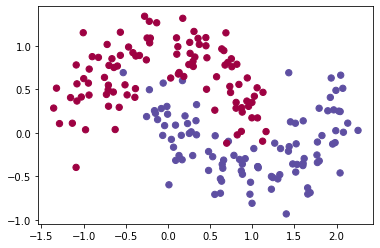

In [ ]:
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

def plot_decision_boundary(pred_func):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

num_examples = len(X)
nn_input_dim = 2
nn_output_dim = 2

epsilon = 0.01
reg_lambda = 0.01

Raplace tanh() with sigmoid() and the derivative of tahn() with the derivative of sigmoid().

sigmoid(x) is "1/(1+e^(-x))".

The deriviate of sigmoid(x) is "sigmoid(x)(1-sigmoid(x))".

Refer to https://math.stackexchange.com/a/1225116.

In [ ]:
def sigmoid(x): # Add it!
  return 1 / (1 + np.exp(-x))

def d_sigmoid(x): # Add it!
  return sigmoid(x) * (1 - sigmoid(x))

def calculate_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    a1 = X.dot(W1) + b1
    h1 = sigmoid(a1) # Change it!
    a2 = h1.dot(W2) + b2
    exp_scores = np.exp(a2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs)
    return 1./num_examples * data_loss

def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    a1 = x.dot(W1) + b1
    h1 = sigmoid(a1) # Change it!
    a2 = h1.dot(W2) + b2
    exp_scores = np.exp(a2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

def build_model(nn_hdim, num_passes=20000, print_loss=False):
    
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))

    model = {}
    
    for i in range(0, num_passes):

        a1 = X.dot(W1) + b1
        h1 = sigmoid(a1) # Change it!
        a2 = h1.dot(W2) + b2
        exp_scores = np.exp(a2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (h1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (d_sigmoid(a1)) # Change it!
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)

        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1

        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
        
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
        if print_loss and i % 1000 == 0:
          print("Loss after iteration %i: %f" %(i, calculate_loss(model)))
    
    return model

Use the same code.

Loss after iteration 0: 0.628365
Loss after iteration 1000: 0.079924
Loss after iteration 2000: 0.069092
Loss after iteration 3000: 0.067554
Loss after iteration 4000: 0.067016
Loss after iteration 5000: 0.066772
Loss after iteration 6000: 0.066649
Loss after iteration 7000: 0.066584
Loss after iteration 8000: 0.066548
Loss after iteration 9000: 0.066528
Loss after iteration 10000: 0.066517
Loss after iteration 11000: 0.066511
Loss after iteration 12000: 0.066507
Loss after iteration 13000: 0.066506
Loss after iteration 14000: 0.066505
Loss after iteration 15000: 0.066504
Loss after iteration 16000: 0.066504
Loss after iteration 17000: 0.066504
Loss after iteration 18000: 0.066505
Loss after iteration 19000: 0.066505


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 3')

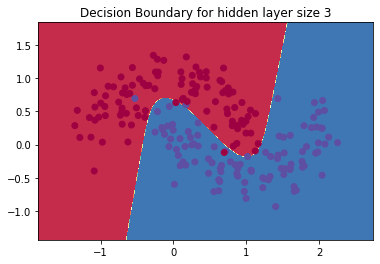

In [ ]:
model = build_model(3, print_loss=True)

plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layer size 3")

**Question 3**

Extend the network from two to three classes. You will need to generate an appropriate dataset for this.

Solution

Use the make_multiclass() function defined in Lab 1.

Notice that y should be an integer array to use the functions in Lab 2.

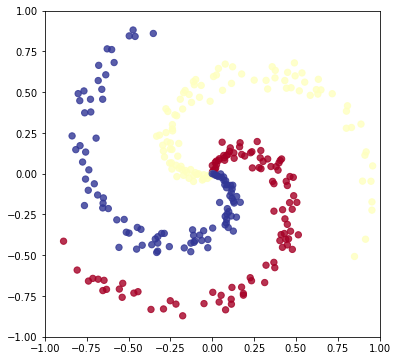

In [ ]:
def make_multiclass(N=100, D=2, K=3):
    np.random.seed(0)
    X = np.zeros((N*K, D))
    y = np.zeros(N*K)
    for j in range(K):
        ix = range(N*j, N*(j+1))
        # radius
        r = np.linspace(0.0,1,N)
        # theta
        t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        y[ix] = j
    fig = plt.figure(figsize=(6, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu, alpha=0.8)
    plt.xlim([-1,1])
    plt.ylim([-1,1])
    return X, y.astype(int) # Change it!

np.random.seed(0)
X, y = make_multiclass(K=3)

Assign nn_output_dim to 3.

In [ ]:
def plot_decision_boundary(pred_func):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

num_examples = len(X)
nn_input_dim = 2
nn_output_dim = 3 # Change it!

epsilon = 0.01
reg_lambda = 0.01

def calculate_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    a1 = X.dot(W1) + b1
    h1 = np.tanh(a1)
    a2 = h1.dot(W2) + b2
    exp_scores = np.exp(a2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs)
    return 1./num_examples * data_loss

def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    a1 = x.dot(W1) + b1
    h1 = np.tanh(a1)
    a2 = h1.dot(W2) + b2
    exp_scores = np.exp(a2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

def build_model(nn_hdim, num_passes=20000, print_loss=False):
    
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))

    model = {}
    
    for i in range(0, num_passes):

        a1 = X.dot(W1) + b1
        h1 = np.tanh(a1)
        a2 = h1.dot(W2) + b2
        exp_scores = np.exp(a2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (h1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(h1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)

        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1

        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
        
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}

        if print_loss and i % 1000 == 0:
          print("Loss after iteration %i: %f" %(i, calculate_loss(model)))
    
    return model

Loss after iteration 0: 0.936053
Loss after iteration 1000: 0.397672
Loss after iteration 2000: 0.407167
Loss after iteration 3000: 0.467964
Loss after iteration 4000: 0.378419
Loss after iteration 5000: 0.373065
Loss after iteration 6000: 0.373587
Loss after iteration 7000: 0.374169
Loss after iteration 8000: 0.398170
Loss after iteration 9000: 0.383746
Loss after iteration 10000: 0.369799
Loss after iteration 11000: 0.618900
Loss after iteration 12000: 0.369666
Loss after iteration 13000: 0.617204
Loss after iteration 14000: 0.368243
Loss after iteration 15000: 0.633046
Loss after iteration 16000: 0.371441
Loss after iteration 17000: 0.381284
Loss after iteration 18000: 0.369219
Loss after iteration 19000: 0.632401


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 3')

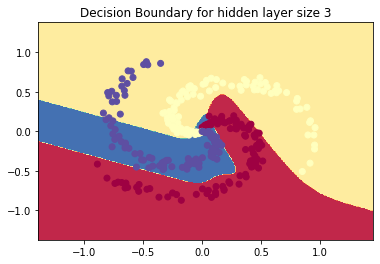

In [ ]:
model = build_model(3, print_loss=True)

plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layer size 3")

**Question 4**

Extend the network to four layers. Experiment with the layer size. Adding another hidden layer means you will need to adjust both the forward propagation as well as the backpropagation code.

Solution

Use the same code.

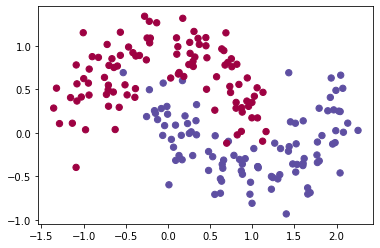

In [ ]:
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

def plot_decision_boundary(pred_func):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

num_examples = len(X)
nn_input_dim = 2
nn_output_dim = 2

epsilon = 0.01
reg_lambda = 0.01

Add W3, b3, h2 and a3, and modify the code accordingly, step by step.

Compared with those in Questions 1 and 2, there are a lots of modifications.

In [ ]:
def calculate_loss(model):
    W1, b1, W2, b2, W3, b3 = model['W1'], model['b1'], model['W2'], model['b2'], model['W3'], model['b3'] # Change it!
    a1 = X.dot(W1) + b1
    h1 = np.tanh(a1)
    a2 = h1.dot(W2) + b2
    h2 = np.tanh(a2) # Add it.
    a3 = h2.dot(W3) + b3 # Add it.
    exp_scores = np.exp(a3) # Change it.
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs)
    return 1./num_examples * data_loss

def predict(model, x):
    W1, b1, W2, b2, W3, b3 = model['W1'], model['b1'], model['W2'], model['b2'], model['W3'], model['b3'] # Change it!
    a1 = x.dot(W1) + b1
    h1 = np.tanh(a1)
    a2 = h1.dot(W2) + b2
    h2 = np.tanh(a2) # Add it.
    a3 = h2.dot(W3) + b3 # Add it.
    exp_scores = np.exp(a3) # Change it.
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

def build_model(nn_hdim, num_passes=20000, print_loss=False):
    
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_hdim) / np.sqrt(nn_hdim) # Add it.
    b2 = np.zeros((1, nn_hdim)) # Add it.
    W3 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim) # Change it.
    b3 = np.zeros((1, nn_output_dim)) # Change it.

    model = {}
    
    for i in range(0, num_passes):

        a1 = X.dot(W1) + b1
        h1 = np.tanh(a1)
        a2 = h1.dot(W2) + b2
        h2 = np.tanh(a2) # Add it.
        a3 = h2.dot(W3) + b3 # Add it.
        exp_scores = np.exp(a3) # Change it.
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

        delta4 = probs # Change it.
        delta4[range(num_examples), y] -= 1 # Change it.
        dW3 = (h2.T).dot(delta4) # Add it.
        db3 = np.sum(delta4, axis=0, keepdims=True) # Add it.
        delta3 = delta4.dot(W3.T) * (1 - np.power(h2, 2)) # Add it.
        dW2 = (h1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(h1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)

        dW3 += reg_lambda * W3 # Add it.
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1

        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
        W3 += -epsilon * dW3 # Add it.
        b3 += -epsilon * db3 # Add it.

        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2, 'W3': W3, 'b3': b3} # Change it.
        
        if print_loss and i % 1000 == 0:
          print("Loss after iteration %i: %f" %(i, calculate_loss(model)))
    
    return model

Loss after iteration 0: 0.470923
Loss after iteration 1000: 0.056878
Loss after iteration 2000: 0.054771
Loss after iteration 3000: 0.059156
Loss after iteration 4000: 0.055567
Loss after iteration 5000: 0.053931
Loss after iteration 6000: 0.054061
Loss after iteration 7000: 0.055755
Loss after iteration 8000: 0.054367
Loss after iteration 9000: 0.043825
Loss after iteration 10000: 0.042667
Loss after iteration 11000: 0.041935
Loss after iteration 12000: 0.042337
Loss after iteration 13000: 0.047303
Loss after iteration 14000: 0.037057
Loss after iteration 15000: 0.055538
Loss after iteration 16000: 0.037114
Loss after iteration 17000: 0.036027
Loss after iteration 18000: 0.040224
Loss after iteration 19000: 0.044655


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 3')

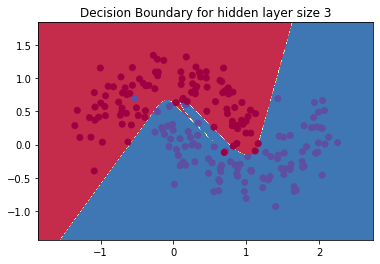

In [ ]:
model = build_model(3, print_loss=True)

plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layer size 3")

Use the same code.

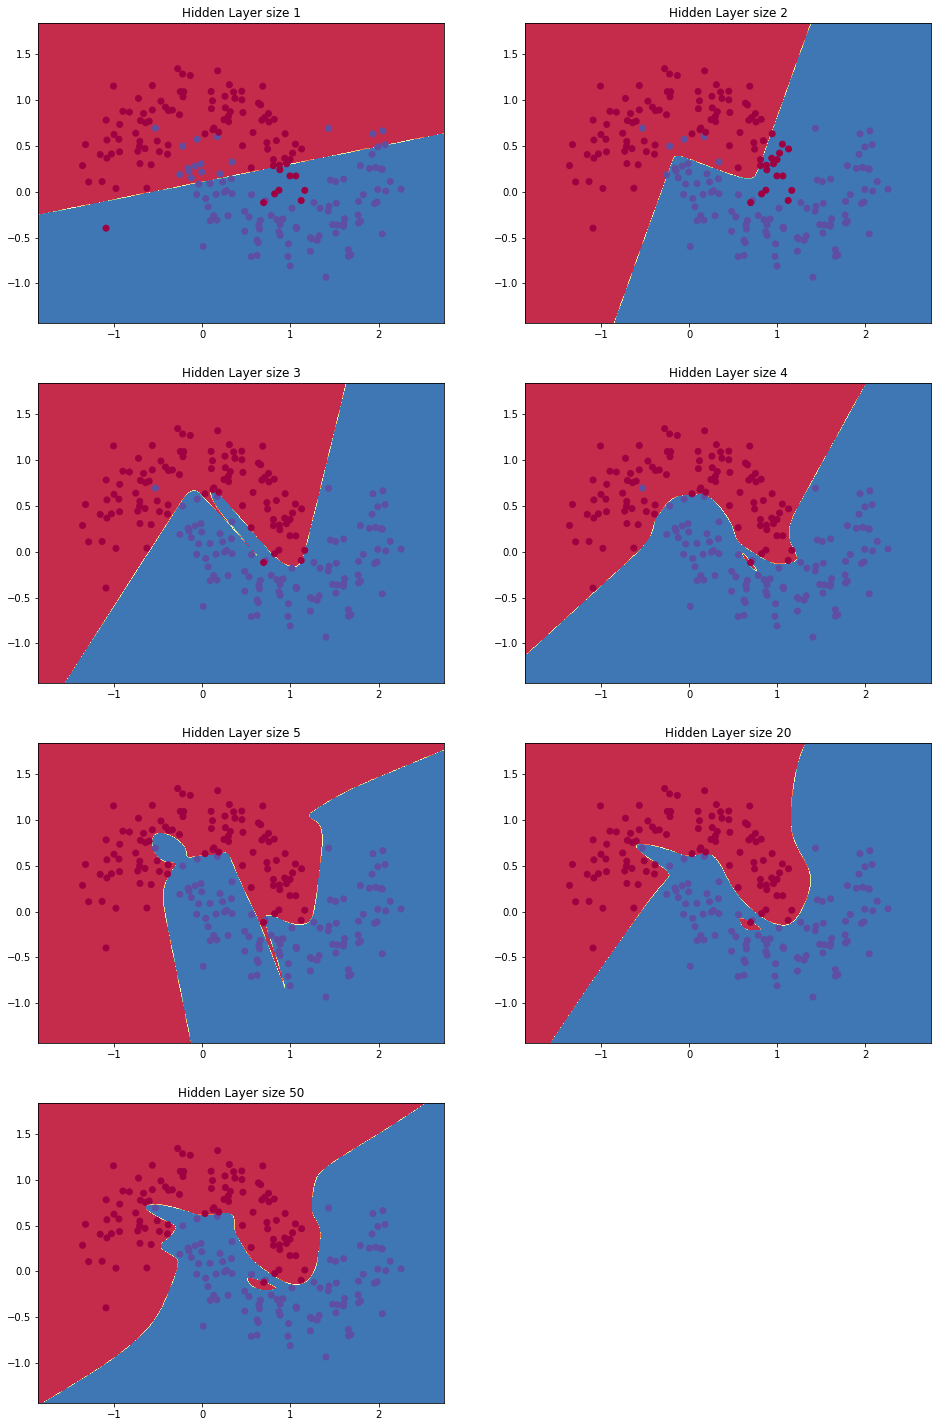

In [ ]:
plt.figure(figsize=(16, 32))
hidden_layer_dimensions = [1, 2, 3, 4, 5, 20, 50]
for i, nn_hdim in enumerate(hidden_layer_dimensions):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer size %d' % nn_hdim)
    model = build_model(nn_hdim)
    plot_decision_boundary(lambda x: predict(model, x))
plt.show()

(End)